In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
salary_data_train = pd.read_csv('SalaryData_Train.csv')
salary_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_data_test = pd.read_csv('SalaryData_Test.csv')
salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
salary_data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
salary_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
salary_data_train = pd.get_dummies(salary_data_train, drop_first=True)
salary_data_test = pd.get_dummies(salary_data_test, drop_first=True)
salary_data_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import scale

In [9]:
salary_data_train_norm = scale(salary_data_train)

<IPython.core.display.Javascript object>

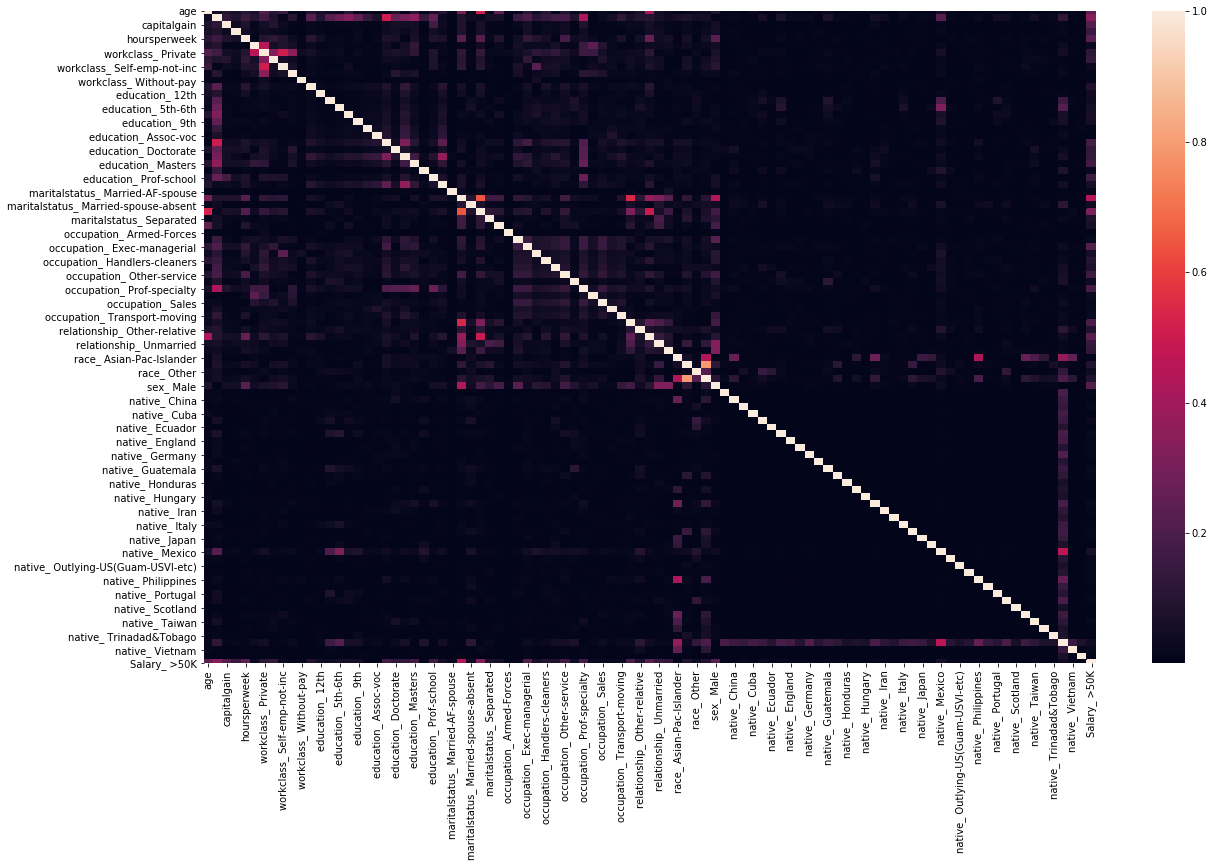

In [10]:
corrMatrix = salary_data_train.corr().abs()
plt.figure(figsize=(20,12))
sns.heatmap(corrMatrix)
plt.show()

In [11]:
from sklearn.decomposition import PCA

In [12]:
salary_data_train.shape

(30161, 95)

In [13]:
pca = PCA(n_components=95)
pca_value = pca.fit(salary_data_train_norm)

In [14]:
var = pca.explained_variance_ratio_
var

array([4.08976343e-02, 2.87135974e-02, 2.72913604e-02, 2.17159825e-02,
       1.95799943e-02, 1.82042763e-02, 1.63607062e-02, 1.57455782e-02,
       1.50208395e-02, 1.42541351e-02, 1.35557223e-02, 1.32066987e-02,
       1.30192331e-02, 1.29136210e-02, 1.25451505e-02, 1.23685914e-02,
       1.22615470e-02, 1.19857377e-02, 1.19208621e-02, 1.17626386e-02,
       1.16580181e-02, 1.15838131e-02, 1.14538635e-02, 1.14332252e-02,
       1.12812654e-02, 1.12503083e-02, 1.11040189e-02, 1.10724216e-02,
       1.09990636e-02, 1.09753269e-02, 1.09310706e-02, 1.08768932e-02,
       1.08291872e-02, 1.07962193e-02, 1.07205496e-02, 1.06711718e-02,
       1.06573503e-02, 1.06110008e-02, 1.05961058e-02, 1.05680914e-02,
       1.05541981e-02, 1.05470630e-02, 1.05443211e-02, 1.05431799e-02,
       1.05379605e-02, 1.05372014e-02, 1.05302278e-02, 1.05284918e-02,
       1.05247080e-02, 1.05054742e-02, 1.05011279e-02, 1.04832713e-02,
       1.04613559e-02, 1.04397595e-02, 1.04113260e-02, 1.03942688e-02,
      

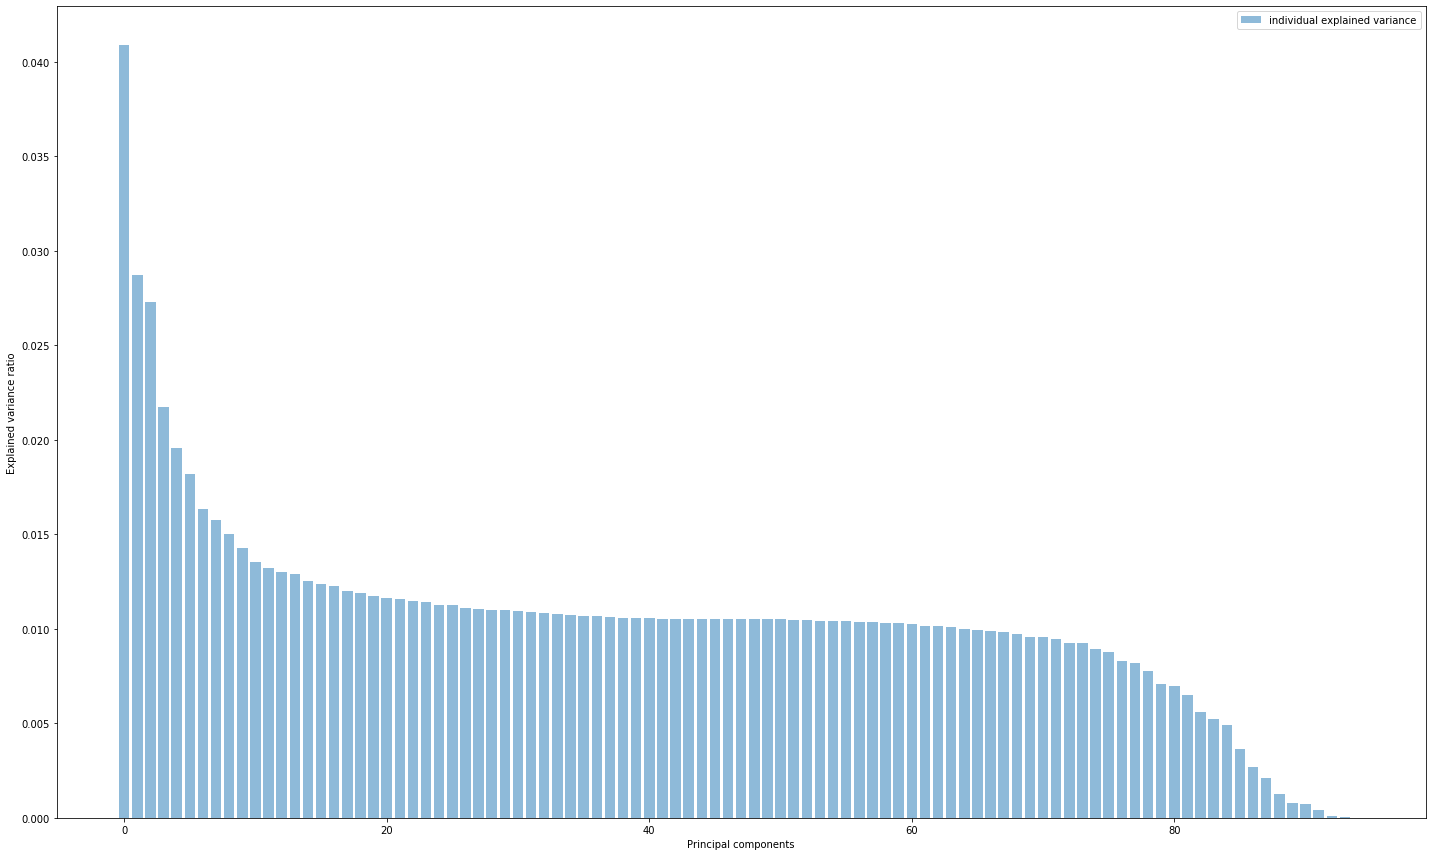

In [15]:
plt.figure(figsize=(20,12))
plt.bar(range(95), var, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [16]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([  4.09,   6.96,   9.69,  11.86,  13.82,  15.64,  17.28,  18.85,
        20.35,  21.78,  23.14,  24.46,  25.76,  27.05,  28.3 ,  29.54,
        30.77,  31.97,  33.16,  34.34,  35.51,  36.67,  37.82,  38.96,
        40.09,  41.22,  42.33,  43.44,  44.54,  45.64,  46.73,  47.82,
        48.9 ,  49.98,  51.05,  52.12,  53.19,  54.25,  55.31,  56.37,
        57.43,  58.48,  59.53,  60.58,  61.63,  62.68,  63.73,  64.78,
        65.83,  66.88,  67.93,  68.98,  70.03,  71.07,  72.11,  73.15,
        74.19,  75.23,  76.26,  77.29,  78.31,  79.32,  80.33,  81.34,
        82.34,  83.33,  84.32,  85.3 ,  86.28,  87.24,  88.2 ,  89.15,
        90.08,  91.  ,  91.89,  92.77,  93.6 ,  94.42,  95.2 ,  95.91,
        96.61,  97.26,  97.82,  98.34,  98.83,  99.2 ,  99.47,  99.68,
        99.81,  99.89,  99.96, 100.  , 100.01, 100.01, 100.01])

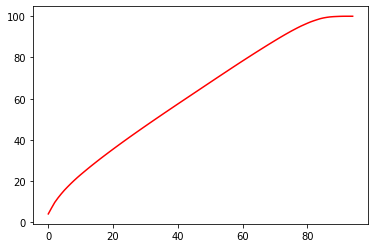

In [17]:
plt.plot(var1,color="red")
plt.show()

In [18]:
salary_data_train.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Han

In [19]:

trainx = salary_data_train.drop(['Salary_ >50K'], axis=1)
trainy = salary_data_train['Salary_ >50K']

testx = salary_data_test.drop(['Salary_ >50K'], axis=1)
testy = salary_data_test['Salary_ >50K']

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(trainx,trainy)

pred_linear_test = model_linear.predict(testx)
np.mean(pred_linear_test == testy)